In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_excel("CustomerChurn.xlsx")
df.head()

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Convert 'Total Charges' to numeric — handles any text, blanks, or errors
df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors="coerce")

# Drop rows with missing Total Charges
df = df.dropna(subset=["Total Charges"])

# Drop irrelevant identifier columns
df_cleaned = df.drop(columns=["Customer ID", "LoyaltyID"])

# Preview the cleaned data
df_cleaned.head()


,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


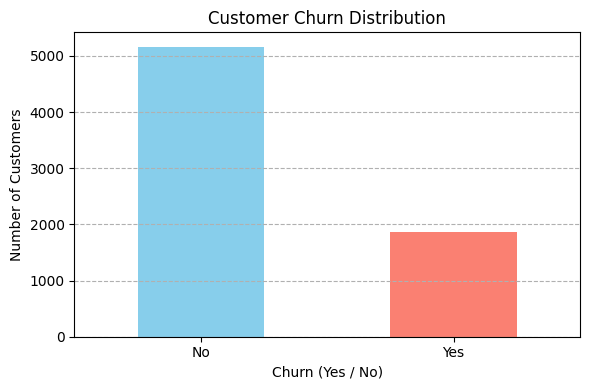

In [ ]:
# Count churned vs non-churned customers
churn_counts = df_cleaned["Churn"].value_counts()

# Plot churn distribution
plt.figure(figsize=(6, 4))
churn_counts.plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Customer Churn Distribution")
plt.xlabel("Churn (Yes / No)")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


<Figure size 800x500 with 0 Axes>

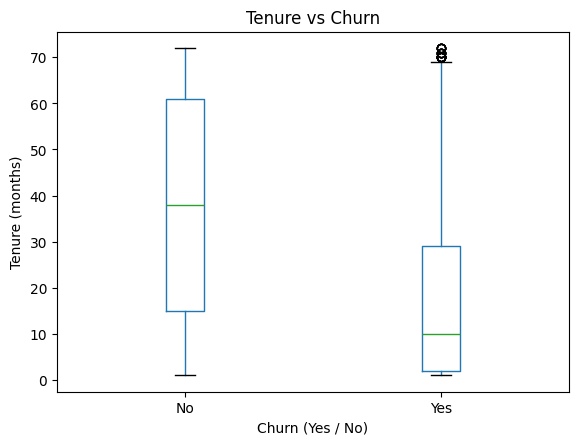

In [ ]:
# Visualize how long customers stayed before churning
plt.figure(figsize=(8, 5))
df_cleaned.boxplot(column="Tenure", by="Churn", grid=False)
plt.title("Tenure vs Churn")
plt.suptitle("")  # Remove default Pandas title
plt.xlabel("Churn (Yes / No)")
plt.ylabel("Tenure (months)")
plt.show()

<Figure size 800x500 with 0 Axes>

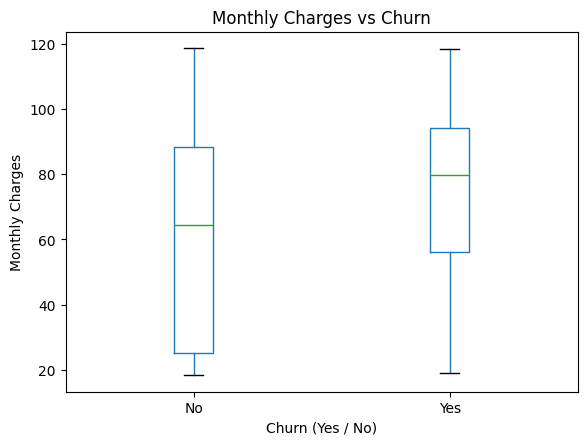

In [ ]:
# Visualize how monthly charges relate to churn
plt.figure(figsize=(8, 5))
df_cleaned.boxplot(column="Monthly Charges", by="Churn", grid=False)
plt.title("Monthly Charges vs Churn")
plt.suptitle("")
plt.xlabel("Churn (Yes / No)")
plt.ylabel("Monthly Charges")
plt.show()

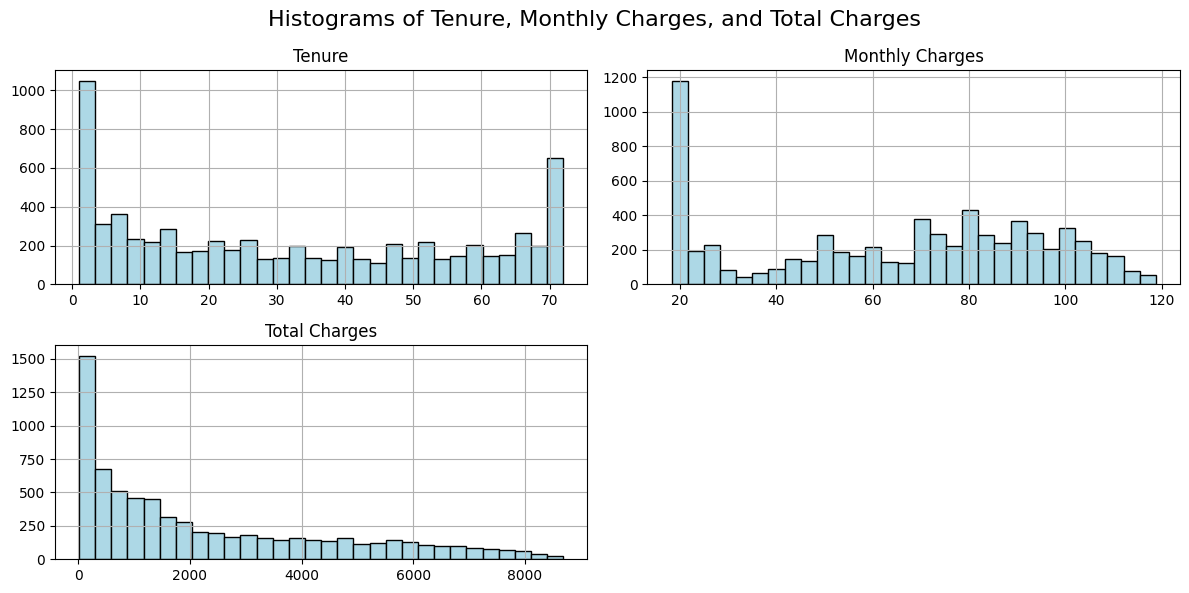

In [ ]:
# Plot histograms of numeric features to understand distribution
numeric_cols = ["Tenure", "Monthly Charges", "Total Charges"]
df_cleaned[numeric_cols].hist(bins=30, figsize=(12, 6), color="lightblue", edgecolor="black")
plt.suptitle("Histograms of Tenure, Monthly Charges, and Total Charges", fontsize=16)
plt.tight_layout()
plt.show()

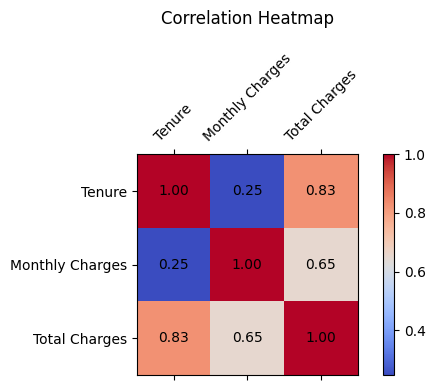

In [ ]:
# Correlation matrix for numeric columns
correlation = df_cleaned[["Tenure", "Monthly Charges", "Total Charges"]].corr()

# Manual heatmap without seaborn
fig, ax = plt.subplots(figsize=(6, 4))
cax = ax.matshow(correlation, cmap="coolwarm")
plt.title("Correlation Heatmap", pad=20)

plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=45)
plt.yticks(range(len(correlation.columns)), correlation.columns)

# Add color scale and values
fig.colorbar(cax)
for (i, j), val in np.ndenumerate(correlation.values):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center', color='black')

plt.tight_layout()
plt.show()